In [2]:
import numpy as np
from data import Instance, DataSet
from miscellaneous import initialize_data, plot_graph, plot_points
from neural_network import NeuralNetwork
from activation_function import *
import matplotlib.pyplot as plt
from keras.datasets import mnist
from sklearn.metrics import confusion_matrix
import seaborn as sns
import warnings
import itertools
warnings.filterwarnings('ignore')
import copy

/home/xeds/.conda/envs/atividade1/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Leitura do conjunto de dados

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

### Descobrindo o número de instâncias e as dimensões de cada uma

In [5]:
num_instances, dim_x, dim_y = x_train.shape
num_instances += x_test.shape[0]

### Normalizando

In [6]:
#Treinamento
norm_input_train = [np.divide(i.astype(np.float32),255).flatten() for i in x_train]

output_train = []
y = 10*[0.0]

for n in y_train:
    y[n] = 1.0
    output_train.append(copy.deepcopy(y))
    y[n] = 0.0

In [7]:
#Teste
norm_input_test = [np.divide(i.astype(np.float32),255).flatten() for i in x_test]

output_test = []
y = 10*[0.0]

for n in y_test:
    y[n] = 1.0
    output_test.append(copy.deepcopy(y))
    y[n] = 0.0

### Organizando o dataset para ser passado no padrão aceito pela rede neural

In [8]:
dataset = DataSet() 

for i,j in zip(norm_input_train + norm_input_test, output_train + output_test):
    dataset.add(Instance(i,j))

### Regularização

#### 1 - Rede Neural 2

In [8]:
net_2 = NeuralNetwork(dim_x*dim_y ,[10], [tanh_func],"l2",0.01) # 84,51% - treino / 85,91% - teste
data_2 = net_2.fit(dataset, "mini-batch", 50, lr_ = 0.1, type = "class", mini_batch_size = 60, 
                   tvt_ratio = [len(norm_input_train), 0, len(norm_input_test)], print_info = True)

Epoch 1/50
60000/60000 [==============================] - 4s 72us/step - loss: 0.1003 - categorical_accuracy: 0.7882
Epoch 2/50
60000/60000 [==============================] - 2s 33us/step - loss: 0.0502 - categorical_accuracy: 0.8441
Epoch 3/50
60000/60000 [==============================] - 2s 33us/step - loss: 0.0495 - categorical_accuracy: 0.8454
Epoch 4/50
60000/60000 [==============================] - 2s 35us/step - loss: 0.0495 - categorical_accuracy: 0.8448
Epoch 5/50
60000/60000 [==============================] - 2s 39us/step - loss: 0.0495 - categorical_accuracy: 0.8445
Epoch 6/50
60000/60000 [==============================] - 2s 36us/step - loss: 0.0495 - categorical_accuracy: 0.8451
Epoch 7/50
60000/60000 [==============================] - 2s 31us/step - loss: 0.0495 - categorical_accuracy: 0.8440
Epoch 8/50
60000/60000 [==============================] - 2s 30us/step - loss: 0.0495 - categorical_accuracy: 0.8449
Epoch 9/50
60000/60000 [==============================] - 2s 40u

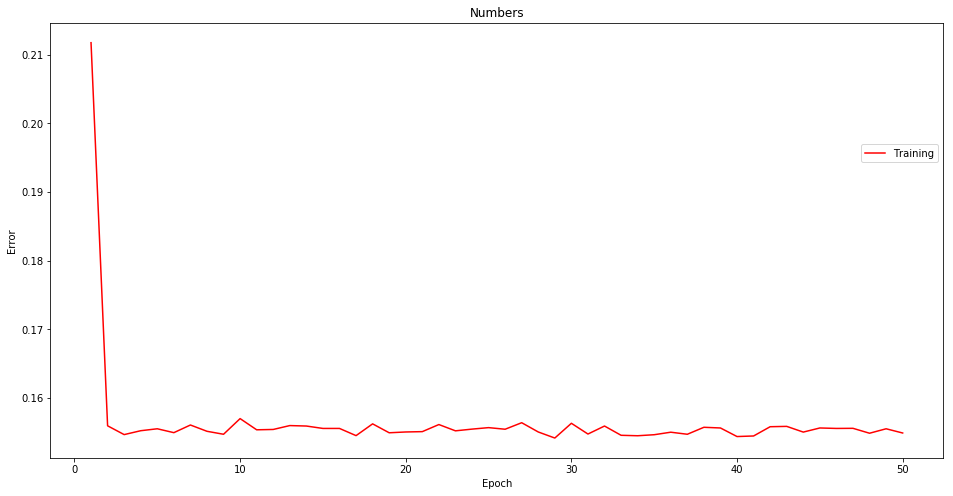

In [9]:
plot_graph(data_2, "Numbers", "Epoch", "Error", figsizex = 16, figsizey = 8)

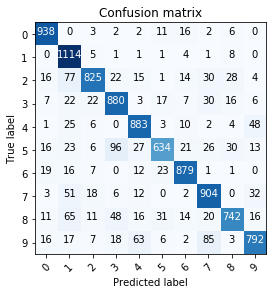

Test Accuracy:  85.91 %


In [16]:
correct = []
predict = []
for i in range(len(net_2.confusion_matrix)):
    for j in range(len(net_2.confusion_matrix)):
        correct = correct + net_2.confusion_matrix[i][j] * [i]
        predict = predict + net_2.confusion_matrix[i][j] * [j]
            
mat = confusion_matrix(correct, predict)
plot_confusion_matrix(mat, classes = [str(i) for i in range(0,10)], title = 'Confusion matrix')
plt.show()

correct_count = 0
total_count = 0
for i in range(len(net_2.confusion_matrix)):
    for j in range(len(net_2.confusion_matrix)):
        total_count += net_2.confusion_matrix[i][j]
        if(i == j):
            correct_count += net_2.confusion_matrix[i][j]

print('Test Accuracy: ', correct_count/total_count * 100, '%')

#### 2 - Rede Neural 3

In [17]:
net_3 = NeuralNetwork(dim_x*dim_y ,[10], [sig_func])# 92,86% - treino / 92,21% - teste
data_3 = net_3.fit(dataset, "mini-batch", 50, lr_ = 0.5, type = "class", mini_batch_size = 60, 
                   tvt_ratio = [len(norm_input_train), 0, len(norm_input_test)], momentum_ = 0.3, print_info = True, 
                   loss_ = "categorical_crossentropy")

Epoch 1/50
60000/60000 [==============================] - 3s 49us/step - loss: 0.3828 - categorical_accuracy: 0.8905
Epoch 2/50
60000/60000 [==============================] - 3s 42us/step - loss: 0.3074 - categorical_accuracy: 0.9129
Epoch 3/50
60000/60000 [==============================] - 2s 36us/step - loss: 0.2981 - categorical_accuracy: 0.9160
Epoch 4/50
60000/60000 [==============================] - 2s 35us/step - loss: 0.2911 - categorical_accuracy: 0.9176
Epoch 5/50
60000/60000 [==============================] - 2s 36us/step - loss: 0.2860 - categorical_accuracy: 0.9191
Epoch 6/50
60000/60000 [==============================] - 2s 34us/step - loss: 0.2842 - categorical_accuracy: 0.9198
Epoch 7/50
60000/60000 [==============================] - 3s 42us/step - loss: 0.2789 - categorical_accuracy: 0.9225
Epoch 8/50
60000/60000 [==============================] - 2s 36us/step - loss: 0.2768 - categorical_accuracy: 0.9217
Epoch 9/50
60000/60000 [==============================] - 2s 36u

In [ ]:
plot_graph(data_3, "Numbers", "Epoch", "Error", figsizex = 16, figsizey = 8)

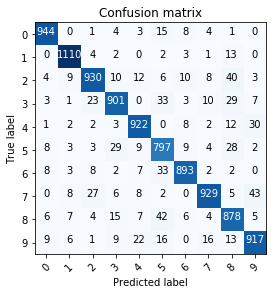

Test Accuracy:  92.21000000000001 %


In [19]:
correct = []
predict = []
for i in range(len(net_3.confusion_matrix)):
    for j in range(len(net_3.confusion_matrix)):
        correct = correct + net_3.confusion_matrix[i][j] * [i]
        predict = predict + net_3.confusion_matrix[i][j] * [j]
            
mat = confusion_matrix(correct, predict)
plot_confusion_matrix(mat, classes = [str(i) for i in range(0,10)], title = 'Confusion matrix')
plt.show()

correct_count = 0
total_count = 0
for i in range(len(net_3.confusion_matrix)):
    for j in range(len(net_3.confusion_matrix)):
        total_count += net_3.confusion_matrix[i][j]
        if(i == j):
            correct_count += net_3.confusion_matrix[i][j]

print('Test Accuracy: ', correct_count/total_count * 100, '%')

#### Apenas testes

In [10]:
net_ca = NeuralNetwork(dim_x*dim_y ,[10], [sig_func])# 92,66% - treino / 91,5% - teste
data_ca = net_ca.fit(dataset, "mini-batch", 50, lr_ = 0.01, type = "class", mini_batch_size = 60, 
                   tvt_ratio = [len(norm_input_train), 0, len(norm_input_test)], momentum_ = 0.0, print_info = True, 
                   loss_ = "categorical_crossentropy", opt = "adam")

Epoch 1/50
60000/60000 [==============================] - 10s 160us/step - loss: 0.3658 - categorical_accuracy: 0.8964
Epoch 2/50
60000/60000 [==============================] - 9s 145us/step - loss: 0.3125 - categorical_accuracy: 0.9147
Epoch 3/50
60000/60000 [==============================] - 7s 116us/step - loss: 0.2991 - categorical_accuracy: 0.9179
Epoch 4/50
60000/60000 [==============================] - 8s 135us/step - loss: 0.2953 - categorical_accuracy: 0.9190
Epoch 5/50
60000/60000 [==============================] - 8s 134us/step - loss: 0.2924 - categorical_accuracy: 0.9204
Epoch 6/50
60000/60000 [==============================] - 7s 118us/step - loss: 0.2893 - categorical_accuracy: 0.9204
Epoch 7/50
60000/60000 [==============================] - 8s 126us/step - loss: 0.2838 - categorical_accuracy: 0.9223
Epoch 8/50
60000/60000 [==============================] - 8s 131us/step - loss: 0.2806 - categorical_accuracy: 0.9231
Epoch 9/50
60000/60000 [==============================]

In [18]:
net_cb = NeuralNetwork(dim_x*dim_y ,[10], [sig_func], "l2", 0.1)# 78,93% - treino / 80,17% - teste
data_cb = net_cb.fit(dataset, "mini-batch", 50, lr_ = 0.01, type = "class", mini_batch_size = 60, 
                   tvt_ratio = [len(norm_input_train), 0, len(norm_input_test)], momentum_ = 0.0, print_info = True, 
                   loss_ = "categorical_crossentropy", opt = "adam")

Epoch 1/50
60000/60000 [==============================] - 9s 156us/step - loss: 1.6306 - categorical_accuracy: 0.7731
Epoch 2/50
60000/60000 [==============================] - 10s 173us/step - loss: 1.4874 - categorical_accuracy: 0.7825
Epoch 3/50
60000/60000 [==============================] - 10s 163us/step - loss: 1.4547 - categorical_accuracy: 0.7848
Epoch 4/50
60000/60000 [==============================] - 10s 173us/step - loss: 1.4470 - categorical_accuracy: 0.7844
Epoch 5/50
60000/60000 [==============================] - 11s 183us/step - loss: 1.4356 - categorical_accuracy: 0.7899
Epoch 6/50
60000/60000 [==============================] - 10s 171us/step - loss: 1.4342 - categorical_accuracy: 0.7884
Epoch 7/50
60000/60000 [==============================] - 11s 189us/step - loss: 1.4333 - categorical_accuracy: 0.7902
Epoch 8/50
60000/60000 [==============================] - 9s 157us/step - loss: 1.4317 - categorical_accuracy: 0.7891
Epoch 9/50
60000/60000 [==========================

#### 3 - Rede Neural 7

In [15]:
net_7 = NeuralNetwork(dim_x*dim_y ,[50, 10], 2*[sig_func]) # 99.89% - treino / 97.35% - teste
data_7 = net_7.fit(dataset, "mini-batch", 35, lr_ = 0.01, type = "class", mini_batch_size = 75, 
                   tvt_ratio = [len(norm_input_train), 0, len(norm_input_test)], momentum_ = 0.0, print_info = True,
                   loss_ = "categorical_crossentropy", opt = "adamax")

Epoch 1/35
60000/60000 [==============================] - 11s 179us/step - loss: 0.3811 - categorical_accuracy: 0.9030
Epoch 2/35
60000/60000 [==============================] - 8s 131us/step - loss: 0.1832 - categorical_accuracy: 0.9477
Epoch 3/35
60000/60000 [==============================] - 8s 129us/step - loss: 0.1423 - categorical_accuracy: 0.9591
Epoch 4/35
60000/60000 [==============================] - 7s 116us/step - loss: 0.1198 - categorical_accuracy: 0.9659
Epoch 5/35
60000/60000 [==============================] - 7s 118us/step - loss: 0.1030 - categorical_accuracy: 0.9707
Epoch 6/35
60000/60000 [==============================] - 10s 160us/step - loss: 0.0911 - categorical_accuracy: 0.9745
Epoch 7/35
60000/60000 [==============================] - 8s 139us/step - loss: 0.0811 - categorical_accuracy: 0.9772
Epoch 8/35
60000/60000 [==============================] - 8s 136us/step - loss: 0.0731 - categorical_accuracy: 0.9796
Epoch 9/35
60000/60000 [==============================

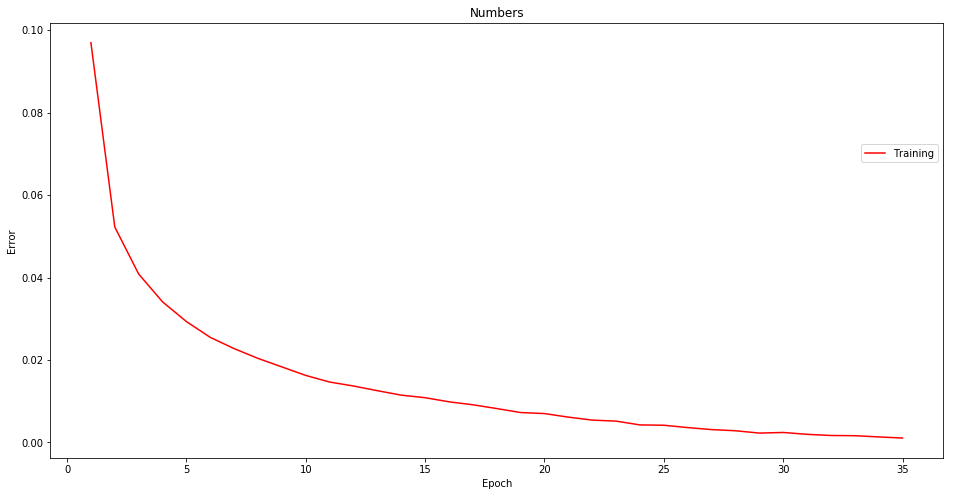

In [16]:
plot_graph(data_7, "Numbers", "Epoch", "Error", figsizex = 16, figsizey = 8)

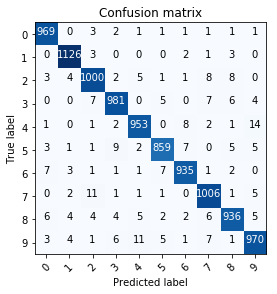

Test Accuracy:  97.35000000000001 %


In [17]:
correct = []
predict = []
for i in range(len(net_7.confusion_matrix)):
    for j in range(len(net_7.confusion_matrix)):
        correct = correct + net_7.confusion_matrix[i][j] * [i]
        predict = predict + net_7.confusion_matrix[i][j] * [j]
            
mat = confusion_matrix(correct, predict)
plot_confusion_matrix(mat, classes = [str(i) for i in range(10)], title = 'Confusion matrix')
plt.show()

correct_count = 0
total_count = 0
for i in range(len(net_7.confusion_matrix)):
    for j in range(len(net_7.confusion_matrix)):
        total_count += net_7.confusion_matrix[i][j]
        if(i == j):
            correct_count += net_7.confusion_matrix[i][j]

print('Test Accuracy: ', correct_count/total_count * 100, '%')